In [25]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [26]:
!pip install pdf2image
!pip install easyocr

In [27]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [28]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [29]:
!wget https://www.bseindia.com/xml-data/corpfiling/AttachHis/0f58c131-c858-49a2-940c-6dc37ae935df.pdf

--2021-05-26 18:11:00--  https://www.bseindia.com/xml-data/corpfiling/AttachHis/0f58c131-c858-49a2-940c-6dc37ae935df.pdf
Resolving www.bseindia.com (www.bseindia.com)... 192.229.211.185, 2606:2800:21f:2c49:1674:6421:889f:6fc7
Connecting to www.bseindia.com (www.bseindia.com)|192.229.211.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12927904 (12M) [application/pdf]
Saving to: ‘0f58c131-c858-49a2-940c-6dc37ae935df.pdf.2’

0f58c131-c858-49a2- 100%[===================>]  12.33M  76.8MB/s    in 0.2s    

2021-05-26 18:11:00 (76.8 MB/s) - ‘0f58c131-c858-49a2-940c-6dc37ae935df.pdf.2’ saved [12927904/12927904]



In [30]:
images = convert_from_path('0f58c131-c858-49a2-940c-6dc37ae935df.pdf')

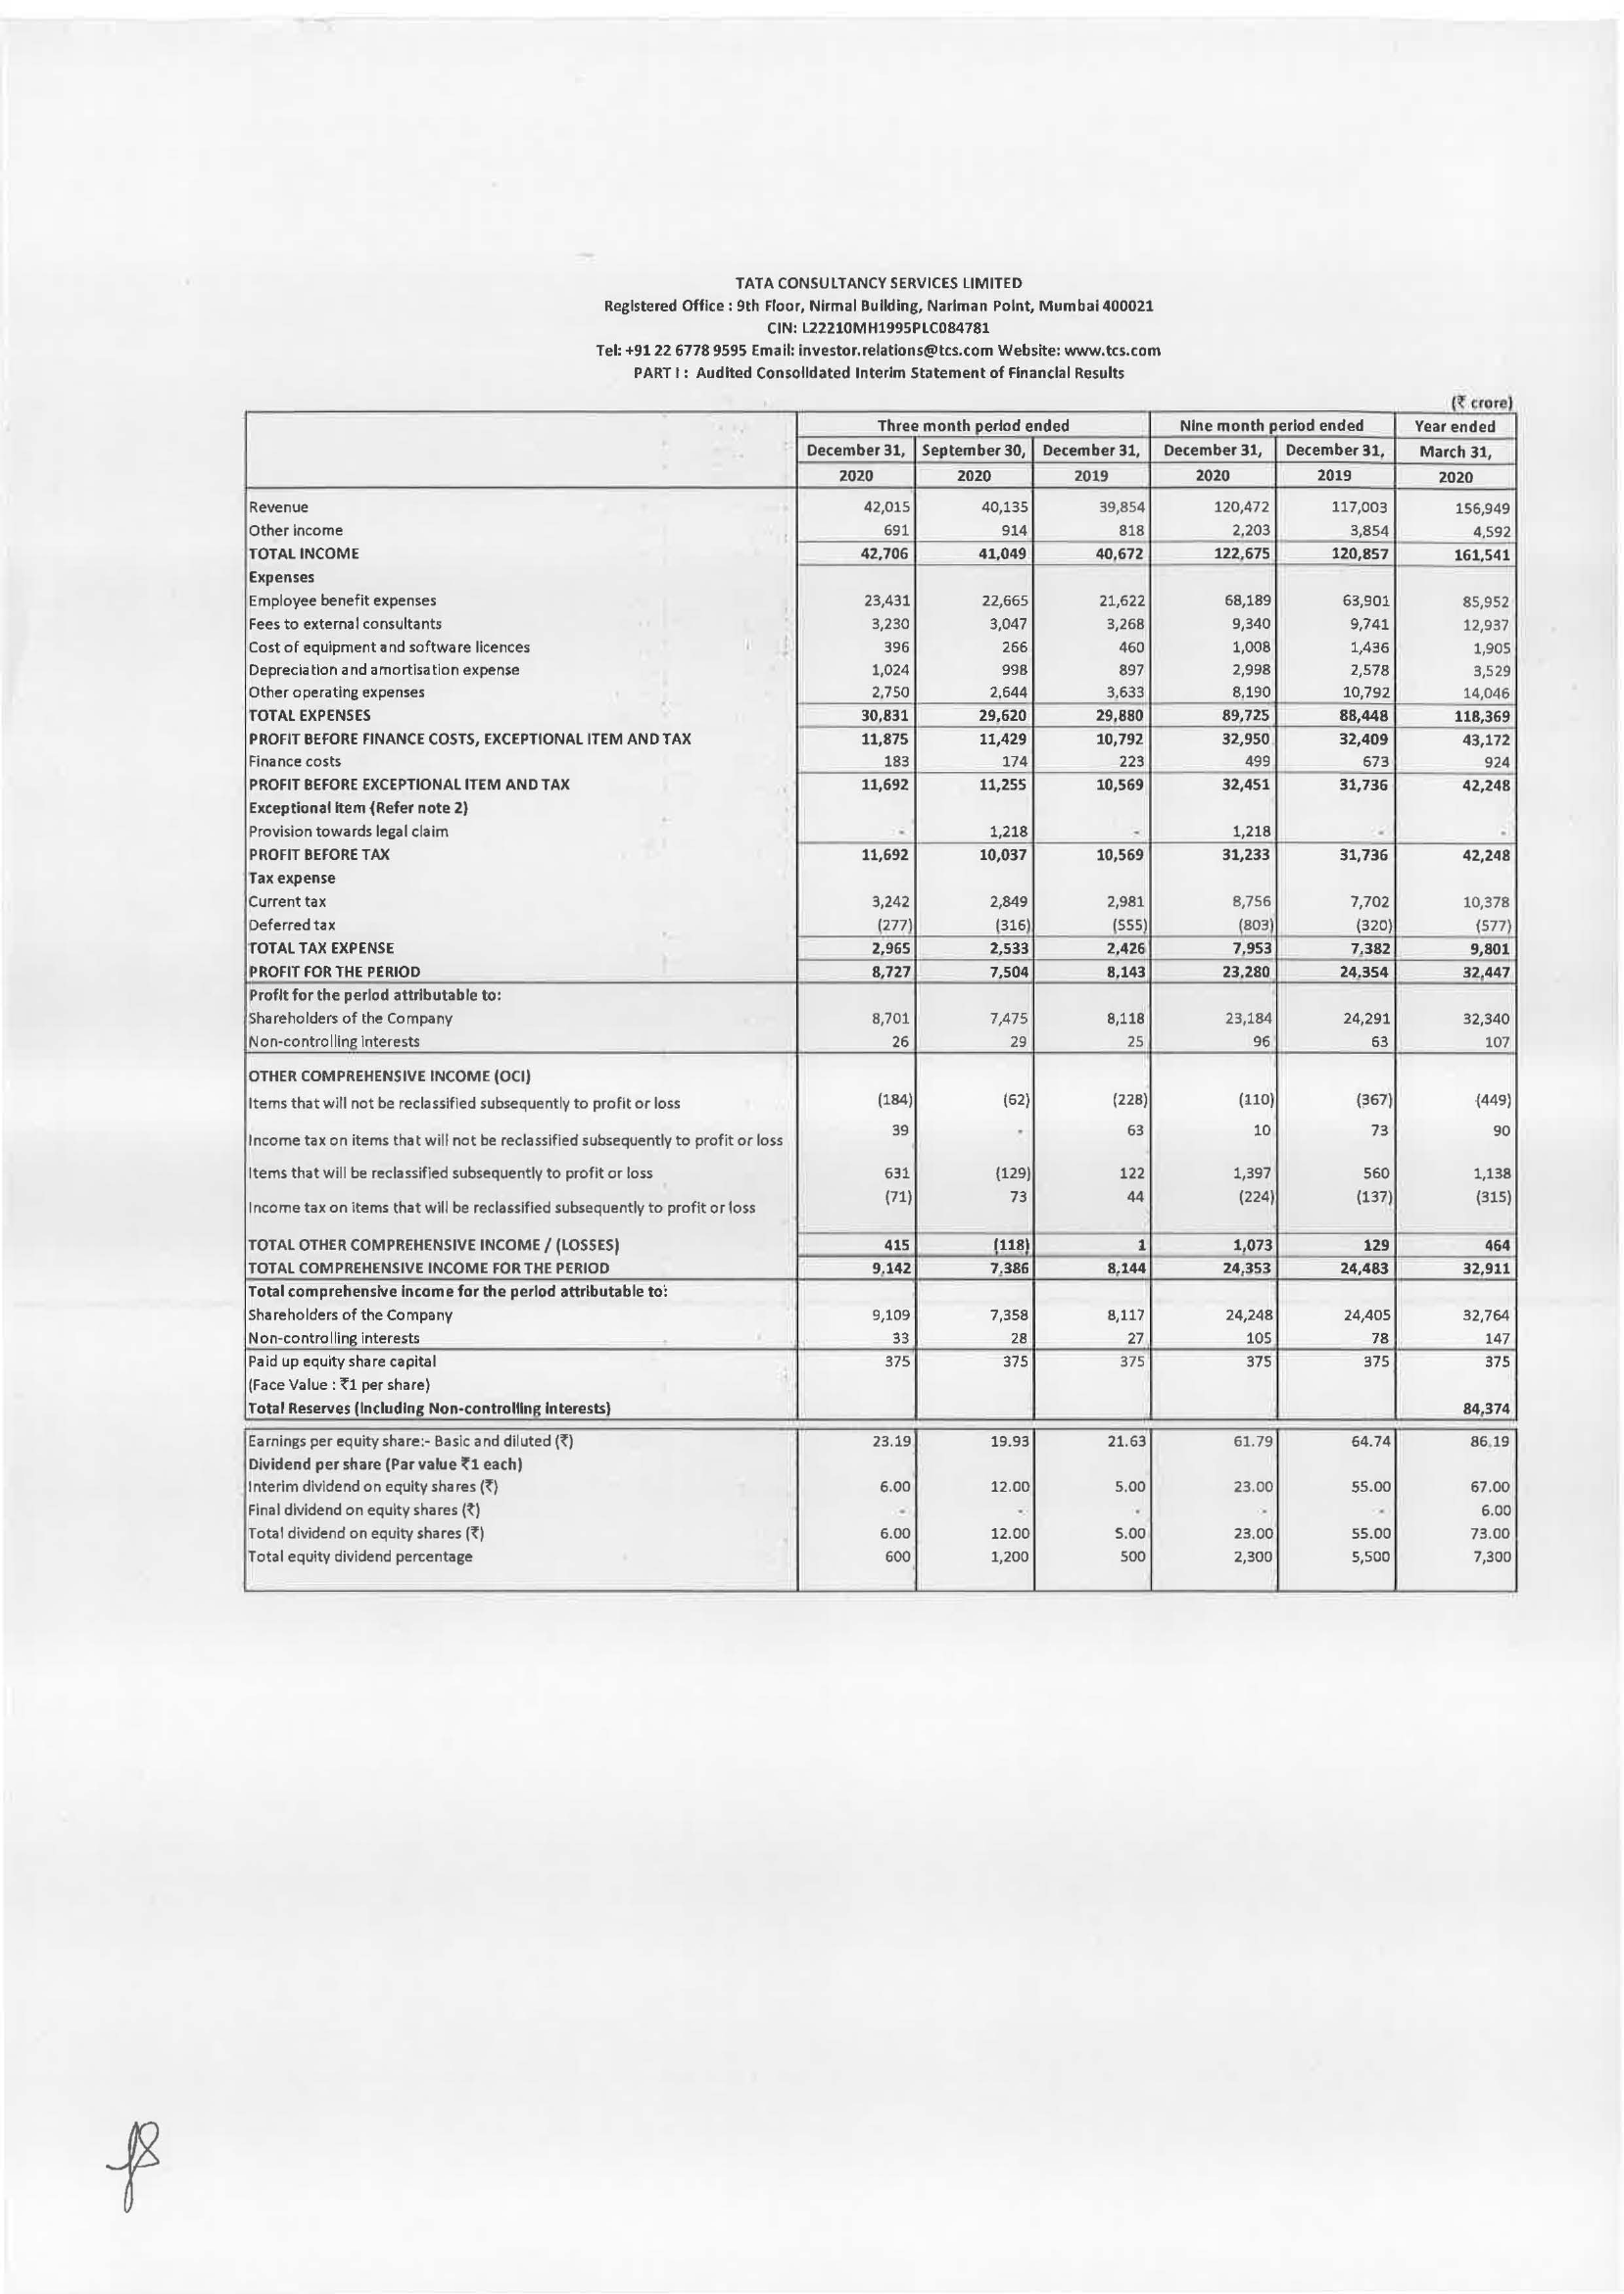

In [31]:
from IPython.display import display, Image
display(images[6])

In [32]:
bounds = reader.readtext(np.array(images[6]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[747, 279], [1047, 279], [1047, 299], [747, 299]],
  'TATA CONSULTANCY SERVICES LIMITED',
  0.9627796601130602),
 ([[612, 298], [1180, 298], [1180, 324], [612, 324]],
  'Reglstered Office ; 9th Floor, Nirmal Building, Nariman Polnt; Mumbai 400021',
  0.646357399078047),
 ([[780, 321], [1014, 321], [1014, 346], [780, 346]],
  'CIN: LZZ210MH19ISPLCO84781',
  0.43078605783596075),
 ([[605, 347], [1189, 347], [1189, 367], [605, 367]],
  'Tel: +91 22 6778 9595 Email: investor;relations@tcs com Website; Www tcs com',
  0.5072623006584145),
 ([[645, 371], [687, 371], [687, 389], [645, 389]],
  'PART',
  0.9992770552635193),
 ([[709, 372], [1151, 372], [1151, 391], [709, 391]],
  'Audited Consolldated Interim Statement of Financlal Results',
  0.6324400667095241),
 ([[1499, 405], [1547, 405], [1547, 421], [1499, 421]],
  'crare|',
  0.553009447038008),
 ([[895, 425], [1095, 425], [1095, 445], [895, 445]],
  'Three month perlod ended',
  0.6989635945158413),
 ([[1205, 425], [1395, 425], [139

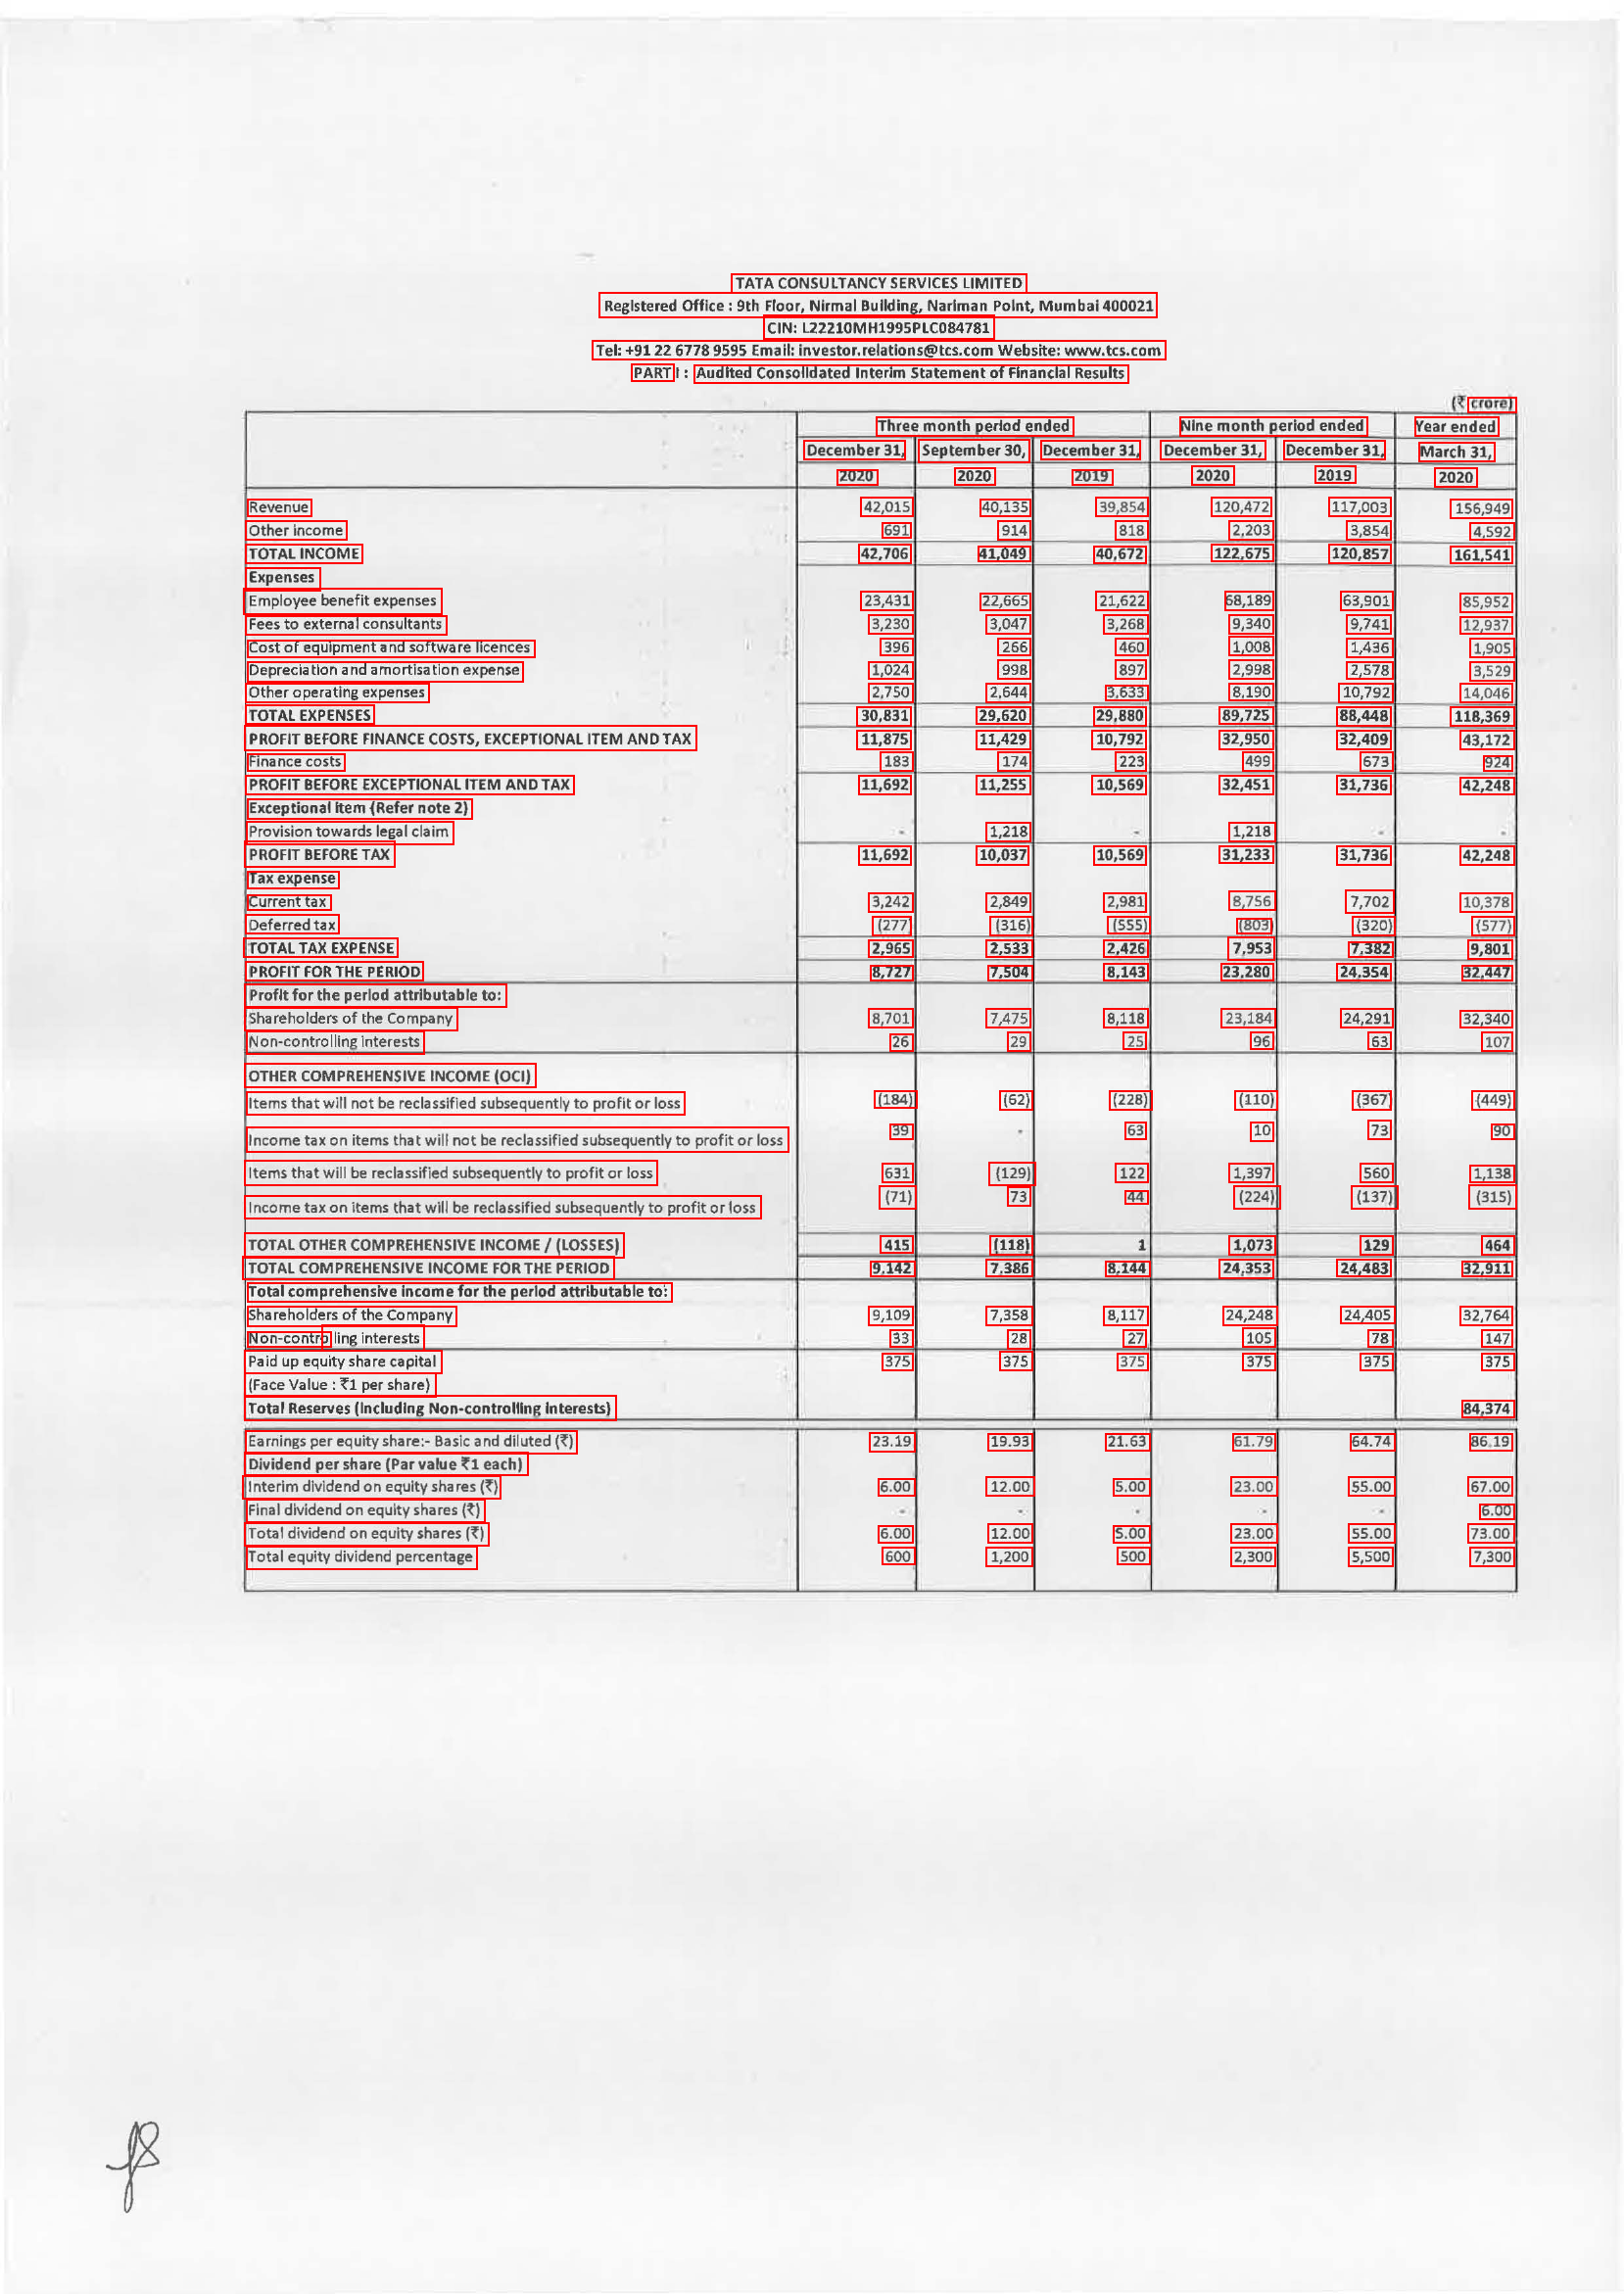

In [47]:
def draw_boxes(image, bounds, color='red', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[6], bounds)

In [57]:
bounds[7][1]

'Three month perlod ended'

In [51]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

TATA CONSULTANCY SERVICES LIMITED
Reglstered Office ; 9th Floor, Nirmal Building, Nariman Polnt; Mumbai 400021
CIN: LZZ210MH19ISPLCO84781
Tel: +91 22 6778 9595 Email: investor;relations@tcs com Website; Www tcs com
PART
Audited Consolldated Interim Statement of Financlal Results
crare|
Three month perlod ended
Nine month period ended
Year ended
December 31,
September 30,
December 31
December 31,
December 31,
March 31,
2020
2020
2019
2020
2019
2020
Revenue
42,015
40,135
39,854
120,472
117,003
156,949
Other income
691
914
818
2,203
3,854
4,592
TOTAL INCOME
42,706
41,049
40,672
122,675
120,857
161,541
Expenses
(Employee benefit expenses
23,431
22,665
21,622
68,189
63,901
85,952
Fees to external consultants
3,230
3,047
3,268
9,340
9,741
12,937
Cost of equipment and software licences
396
266
460
1,008
1,436
1,905
Depreciatlon andamortisation expense
1,024
998
897
2,998
2,578
3,529
Other operating expenses
2,750
2,644
3,633
8,190
10,792
14,046
TOTAL EXPENSES
30,831
29,620
29,880
89,725
88,44